<a href="https://colab.research.google.com/github/Awonke03/Automobile-Fraud-detection/blob/main/Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Research Project

/content/drive/MyDrive/Research Project


In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [5]:
df=pd.read_csv("carclaims.csv")
df

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0              Jan                   1  Female        Single  ...   
1              Jan                   4    Male        Single  ...   
2              Nov                   2    Male       Married  ...   
3              Jul                   1    Male       Married  ...   
4              Feb                   2  Female        Single  ...   
...            ...                 ...     ...           ...  ...   
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0               26 to 30                No             No  External   
1               31 to 35               Yes             No  External   
2               41 to 50                No             No  External   
3               51 to 65               Yes             No  External   
4               31 to 35                No             No  External   
...                  ...               ...            ...       ...   
15415           31 to 35                No             No  External   
15416           31 to 35                No             No  External   
15417           26 to 30                No             No  External   
15418           31 to 35                No             No  External   
15419           26 to 30                No             No  External   

      NumberOfSuppliments  AddressChange-Claim  NumberOfCars  Year  \
0                    none               1 year        3 to 4  1994   
1                    none            no change     1 vehicle  1994   
2                    none            no change     1 vehicle  1994   
3             more than 5            no change     1 vehicle  1994   
4                    none            no change     1 vehicle  1994   
...                   ...                  ...           ...   ...   
15415                none            no change     1 vehicle  1996   
15416         more than 5            no change        3 to 4  1996   
15417              1 to 2            no change     1 vehicle  1996   
15418         more than 5            no change     1 vehicle  1996   
15419              1 to 2            no change     1 vehicle  1996   

       BasePolicy FraudFound  
0       Liability         No  
1       Collision         No  
2       Collision         No  
3       Liability         No  
4       Collision         No  
...           ...        ...  
15415   Collision        Yes  
15416   Liability         No  
15417   Collision        Yes  
15418  All Perils         No  
15419   Collision        Yes  

[15420 rows x 33 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [7]:
df["Fault"].value_counts()

Fault
Policy Holder    11230
Third Party       4190
Name: count, dtype: int64

In [8]:
df["Month"].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [9]:
unique_makes = df['Make'].unique()
unique_makes

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [10]:
fraud_counts = df['FraudFound'].value_counts()
fraud_counts

FraudFound
No     14497
Yes      923
Name: count, dtype: int64

In [11]:
df['FraudFound'] = df['FraudFound'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# 1. Fraud Distribution by Make
fig1 = px.bar(df.groupby('Make')['FraudFound'].sum().reset_index(),
              x='Make', y='FraudFound',
              title='Fraudulent Claims by Vehicle Make',
              labels={'FraudFound': 'Number of Fraud Cases'})
fig1.show()

In [12]:
# 2. Fraud by Accident Area
fig2 = px.pie(df, names='AccidentArea', values='FraudFound',
              title='Fraud Distribution by Accident Area')
fig2.show()


In [13]:
# 3. Fraud Count by Age Group
fig3 = px.bar(df.groupby('AgeOfPolicyHolder')['FraudFound'].sum().reset_index(),
              x='AgeOfPolicyHolder', y='FraudFound',
              title='Fraud Cases by Age Group',
              labels={'FraudFound': 'Number of Fraud Cases'})
fig3.show()

In [14]:
df

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0              Jan                   1  Female        Single  ...   
1              Jan                   4    Male        Single  ...   
2              Nov                   2    Male       Married  ...   
3              Jul                   1    Male       Married  ...   
4              Feb                   2  Female        Single  ...   
...            ...                 ...     ...           ...  ...   
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0               26 to 30                No             No  External   
1               31 to 35               Yes             No  External   
2               41 to 50                No             No  External   
3               51 to 65               Yes             No  External   
4               31 to 35                No             No  External   
...                  ...               ...            ...       ...   
15415           31 to 35                No             No  External   
15416           31 to 35                No             No  External   
15417           26 to 30                No             No  External   
15418           31 to 35                No             No  External   
15419           26 to 30                No             No  External   

      NumberOfSuppliments  AddressChange-Claim  NumberOfCars  Year  \
0                    none               1 year        3 to 4  1994   
1                    none            no change     1 vehicle  1994   
2                    none            no change     1 vehicle  1994   
3             more than 5            no change     1 vehicle  1994   
4                    none            no change     1 vehicle  1994   
...                   ...                  ...           ...   ...   
15415                none            no change     1 vehicle  1996   
15416         more than 5            no change        3 to 4  1996   
15417              1 to 2            no change     1 vehicle  1996   
15418         more than 5            no change     1 vehicle  1996   
15419              1 to 2            no change     1 vehicle  1996   

       BasePolicy FraudFound  
0       Liability          0  
1       Collision          0  
2       Collision          0  
3       Liability          0  
4       Collision          0  
...           ...        ...  
15415   Collision          1  
15416   Liability          0  
15417   Collision          1  
15418  All Perils          0  
15419   Collision          1  

[15420 rows x 33 columns]

In [15]:
# Re-aggregate after cleaning
sunburst_df = df.groupby(['MonthClaimed', 'DayOfWeekClaimed'])['FraudFound'].sum().reset_index()

# Filter only groups with fraud count > 0
sunburst_df = sunburst_df[sunburst_df['FraudFound'] > 0]

import plotly.express as px

fig = px.sunburst(
    sunburst_df,
    path=['MonthClaimed', 'DayOfWeekClaimed'],
    values='FraudFound',
    title='Fraud Sunburst: Month → Day of Week',
    color='FraudFound',
    color_continuous_scale='Reds'
)
fig.show()



In [16]:
# 4. Heatmap of Fraud vs. Day and Month
pivot = df.pivot_table(index='DayOfWeek', columns='MonthClaimed', values='FraudFound', aggfunc='sum')
fig4 = px.imshow(pivot,
                 labels=dict(x="Month Claimed", y="Day of Week", color="Fraud Count"),
                 title="Fraud Heatmap by Day and Month")
fig4.show()


In [17]:
# 5. Sunburst: BasePolicy -> AgentType -> Fraud
fig5 = px.sunburst(df, path=['BasePolicy', 'AgentType', 'FraudFound'],
                   title='Fraud by Policy Type and Agent')
fig5.show()

In [18]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# Copy the original data
data = df.copy()

# Encode all categorical features
for col in data.select_dtypes(include='object').columns:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Separate features and target
X = data.drop(columns='FraudFound')
y = data['FraudFound']

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create DataFrame of results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Plot using Plotly
fig = px.bar(mi_df,
             x='Feature',
             y='MI Score',
             title='Mutual Information Scores for Fraud Detection Features',
             color='MI Score',
             color_continuous_scale='Bluered_r')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [19]:
zero_mi_features = [
    'PolicyNumber', 'AgentType', 'WitnessPresent', 'PoliceReportFiled', 'NumberOfCars'
]
# Drop features with zero MI score from the original dataframe
df_filtered = df.drop(columns=zero_mi_features).copy()

print(f"Original number of columns: {df.shape[1]}")
print(f"Number of columns after removing zero MI features: {df_filtered.shape[1]}")


Original number of columns: 33
Number of columns after removing zero MI features: 28


In [20]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

# Modelling

In [21]:
pip install lime shap catboost pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.8 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6fd453ef5b68a6abd80c7adb9b03652a6142a2f944d6c8b6c2172253e6161681
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [22]:
# Suppress harmless warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation & preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Resampling techniques
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# Explainable AI
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer


#Traditional Models and Data

In [23]:
df = df.copy()

# Drop rows with '?' values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Ensure FraudFound is numeric
df['FraudFound'] = pd.to_numeric(df['FraudFound'])

# Separate features and target
X = df.drop('FraudFound', axis=1)
y = df['FraudFound']

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)


In [25]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# CatBoost (silent mode to suppress logs)
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)


In [26]:
# Predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
cat_preds = cat_model.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("CatBoost Accuracy:", accuracy_score(y_test, cat_preds))


Random Forest Accuracy: 0.9377431906614786
XGBoost Accuracy: 0.9520103761348897
CatBoost Accuracy: 0.9490920881971465


In [27]:
# Dictionary to hold models and predictions
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": cat_model
}

# Evaluate each model
for name, model in models.items():
    print(f"\n===== {name} Evaluation =====")
    y_pred = model.predict(X_test)

    # Metrics
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))



===== Random Forest Evaluation =====
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       1.00      0.03      0.05       197

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.51      3084
weighted avg       0.94      0.94      0.91      3084

Confusion Matrix:
 [[2887    0]
 [ 192    5]]
ROC AUC Score: 0.5126903553299492
Precision: 1.0
Recall: 0.025380710659898477
F1 Score: 0.04950495049504951

===== XGBoost Evaluation =====
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2887
           1       0.80      0.33      0.47       197

    accuracy                           0.95      3084
   macro avg       0.88      0.66      0.72      3084
weighted avg       0.95      0.95      0.94      3084

Confusion Matrix:
 [[2871   16]
 [ 132   65]]
ROC AUC Score: 0.66220357668

In [28]:
# Reuse cleaned X and y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [29]:
# MLP architecture
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9386 - loss: 0.2453 - val_accuracy: 0.9331 - val_loss: 0.2218
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9421 - loss: 0.1911 - val_accuracy: 0.9331 - val_loss: 0.2117
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9467 - loss: 0.1782 - val_accuracy: 0.9331 - val_loss: 0.2085
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9457 - loss: 0.1794 - val_accuracy: 0.9331 - val_loss: 0.2086
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9408 - loss: 0.1791 - val_accuracy: 0.9331 - val_loss: 0.2131
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9481 - loss: 0.1666 - val_accuracy: 0.9331 - val_loss: 0.2101
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9416 - loss: 0.1778 - val_accuracy: 0.9335 - val_loss: 0.2073
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9472 - loss: 0.1668 - val_accuracy

In [30]:
# Reshape: CNN expects 3D input (samples, rows, columns)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9386 - loss: 0.2405 - val_accuracy: 0.9331 - val_loss: 0.2261
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9402 - loss: 0.2059 - val_accuracy: 0.9331 - val_loss: 0.2147
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9458 - loss: 0.1896 - val_accuracy: 0.9331 - val_loss: 0.2143
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9458 - loss: 0.1861 - val_accuracy: 0.9331 - val_loss: 0.2133
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9422 - loss: 0.1919 - val_accuracy: 0.9331 - val_loss: 0.2111
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9440 - loss: 0.1828 - val_accuracy: 0.9331 - val_loss: 0.2133
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9428 - loss: 0.1898 - val_accuracy: 0.9331 - val_loss: 0.2108
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9439 - loss: 0.1855 - val_accuracy: 

In [31]:
# MLP
mlp_preds = (mlp_model.predict(X_test) > 0.5).astype("int32")
print("\n=== MLP Evaluation ===")
print(classification_report(y_test, mlp_preds))
print("ROC AUC:", roc_auc_score(y_test, mlp_preds))

# CNN
cnn_preds = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")
print("\n=== CNN Evaluation ===")
print(classification_report(y_test, cnn_preds))
print("ROC AUC:", roc_auc_score(y_test, cnn_preds))


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

=== MLP Evaluation ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.57      0.02      0.04       197

    accuracy                           0.94      3084
   macro avg       0.75      0.51      0.50      3084
weighted avg       0.91      0.94      0.91      3084

ROC AUC: 0.5096327137755632
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

=== CNN Evaluation ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

ROC AUC: 0.5


#ADASYN

In [32]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: ADASYN Resampling on Training Data
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_res.value_counts())

# Step 3: Initialize and Train Models

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)


# CatBoost
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_res, y_train_res)

# Step 4: Make Predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
cat_preds = cat_model.predict(X_test)

# Step 5: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (micro):", precision_score(y_true, y_pred, average='micro'))
    print("Recall (micro):", recall_score(y_true, y_pred, average='micro'))
    print("F1 Score (micro):", f1_score(y_true, y_pred, average='micro'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Step 6: Evaluate Each Model
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("CatBoost", y_test, cat_preds)


Original class distribution:
 FraudFound
0    11610
1      726
Name: count, dtype: int64
Resampled class distribution:
 FraudFound
0    11610
1    11470
Name: count, dtype: int64

--- Random Forest ---
Accuracy: 0.9095330739299611
Precision (micro): 0.9095330739299611
Recall (micro): 0.9095330739299611
F1 Score (micro): 0.9095330739299611
ROC AUC Score: 0.5472853101334707
Confusion Matrix:
 [[2779  108]
 [ 171   26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2887
           1       0.19      0.13      0.16       197

    accuracy                           0.91      3084
   macro avg       0.57      0.55      0.55      3084
weighted avg       0.89      0.91      0.90      3084


--- XGBoost ---
Accuracy: 0.9474708171206225
Precision (micro): 0.9474708171206225
Recall (micro): 0.9474708171206225
F1 Score (micro): 0.9474708171206225
ROC AUC Score: 0.7023467706628173
Confusion Matrix:
 [[2839   48]
 [ 114

In [33]:
# For MLP: no need to reshape
X_train_mlp, X_test_mlp = X_train_res, X_test

# For CNN: reshape input to 3D
X_train_cnn = X_train_res.values.reshape(-1, X_train_res.shape[1], 1)
X_test_cnn = X_test.values.reshape(-1, X_test.shape[1], 1)


In [34]:
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_mlp.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train_mlp, y_train_res, epochs=10, batch_size=32, verbose=0)

mlp_preds = (mlp_model.predict(X_test_mlp) > 0.5).astype(int)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [35]:
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_res, epochs=10, batch_size=32, verbose=0)

cnn_preds = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [36]:
import pandas as pd

def get_metrics(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='micro'),
        "Recall": recall_score(y_true, y_pred, average='micro'),
        "F1 Score": f1_score(y_true, y_pred, average='micro'),
        "ROC AUC": roc_auc_score(y_true, y_pred)
    }

results = []
results.append(get_metrics("Random Forest", y_test, rf_preds))
results.append(get_metrics("XGBoost", y_test, xgb_preds))
results.append(get_metrics("CatBoost", y_test, cat_preds))
results.append(get_metrics("MLP", y_test, mlp_preds))
results.append(get_metrics("CNN", y_test, cnn_preds))

metrics_df = pd.DataFrame(results)
print("\n📊 Model Performance Summary:\n")
print(metrics_df.round(4))



📊 Model Performance Summary:

           Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Random Forest    0.9095     0.9095  0.9095    0.9095   0.5473
1        XGBoost    0.9475     0.9475  0.9475    0.9475   0.7023
2       CatBoost    0.9491     0.9491  0.9491    0.9491   0.7316
3            MLP    0.9361     0.9361  0.9361    0.9361   0.5000
4            CNN    0.9358     0.9358  0.9358    0.9358   0.4998


#ADASYN & Stratified Resampling

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Apply ADASYN on training data only
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_res.value_counts())

# Step 3: Train Models

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# XGBoost
xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# CatBoost (silent mode to suppress logs)
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_res, y_train_res)

# Step 4: Predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
cat_preds = cat_model.predict(X_test)

# Step 5: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (micro):", precision_score(y_true, y_pred, average='micro'))
    print("Recall (micro):", recall_score(y_true, y_pred, average='micro'))
    print("F1 Score (micro):", f1_score(y_true, y_pred, average='micro'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Step 6: Evaluate All Models
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("CatBoost", y_test, cat_preds)


Original class distribution:
 FraudFound
0    11598
1      738
Name: count, dtype: int64
Resampled class distribution:
 FraudFound
1    11645
0    11598
Name: count, dtype: int64

--- Random Forest ---
Accuracy: 0.9105058365758755
Precision (micro): 0.9105058365758755
Recall (micro): 0.9105058365758755
F1 Score (micro): 0.9105058365758755
ROC AUC Score: 0.5627420452532561
Confusion Matrix:
 [[2777  122]
 [ 154   31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2899
           1       0.20      0.17      0.18       185

    accuracy                           0.91      3084
   macro avg       0.58      0.56      0.57      3084
weighted avg       0.90      0.91      0.91      3084


--- XGBoost ---
Accuracy: 0.9513618677042801
Precision (micro): 0.9513618677042801
Recall (micro): 0.9513618677042801
F1 Score (micro): 0.9513618677042801
ROC AUC Score: 0.7185758369614872
Confusion Matrix:
 [[2850   49]
 [ 101

In [38]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42,stratify=y
)

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# ==== MLP ====
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train MLP
mlp_model.fit(X_train_res, y_train_res, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# ==== CNN ====

# Reshape data for CNN: (samples, features, 1)
X_train_res_cnn = X_train_res.reshape(X_train_res.shape[0], X_train_res.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_res.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_model.fit(X_train_res_cnn, y_train_res, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6906 - loss: 0.5635 - val_accuracy: 0.8114 - val_loss: 0.5472
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7852 - loss: 0.4234 - val_accuracy: 0.7467 - val_loss: 0.5785
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8098 - loss: 0.3890 - val_accuracy: 0.7707 - val_loss: 0.5349
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8277 - loss: 0.3639 - val_accuracy: 0.7364 - val_loss: 0.5813
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8458 - loss: 0.3313 - val_accuracy: 0.7726 - val_loss: 0.5345
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8545 - loss: 0.3179 - val_accuracy: 0.8086 - val_loss: 0.4969
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8693 - loss: 0.3009 - val_accuracy: 0.7892 - val_loss: 0.5110
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8749 - loss: 0.2837 - val_accuracy: 

In [39]:
# MLP Predictions
mlp_preds = (mlp_model.predict(X_test) > 0.5).astype("int32")

# CNN Predictions
cnn_preds = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")
def print_metrics(y_true, y_pred, model_name="Model"):
    print(f"\n📊 Metrics for {model_name}")
    print("----------------------------------")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='binary'))
    print("Recall:", recall_score(y_true, y_pred, average='binary'))
    print("F1-score:", f1_score(y_true, y_pred, average='binary'))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
print_metrics(y_test, mlp_preds, model_name="MLP")
print_metrics(y_test, cnn_preds, model_name="CNN")


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

📊 Metrics for MLP
----------------------------------
Accuracy: 0.8560311284046692
Precision: 0.1509433962264151
Recall: 0.3027027027027027
F1-score: 0.2014388489208633

Confusion Matrix:
 [[2584  315]
 [ 129   56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      2899
           1       0.15      0.30      0.20       185

    accuracy                           0.86      3084
   macro avg       0.55      0.60      0.56      3084
weighted avg       0.90      0.86      0.88      3084


📊 Metrics for CNN
----------------------------------
Accuracy: 0.8608949416342413
Precision: 0.17027027027027028
Recall: 0.34054054054054056
F1-score: 0.22702702702702704

Confusion Matrix:
 [[2592  307]
 [ 122   63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      2899
 

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Ensure predictions are ready for all models
mlp_preds = (mlp_model.predict(X_test) > 0.5).astype(int)
cnn_preds = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)

# Define metric collection function
def get_metrics(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_pred)
    }

# Collect results
results = [
    get_metrics("Random Forest", y_test, rf_preds),
    get_metrics("XGBoost", y_test, xgb_preds),
    get_metrics("CatBoost", y_test, cat_preds),
    get_metrics("MLP", y_test, mlp_preds),
    get_metrics("CNN", y_test, cnn_preds),
]

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Summary:\n")
print(results_df.round(4))


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

📊 Model Performance Summary:

           Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Random Forest    0.9105     0.2026  0.1676    0.1834   0.5627
1        XGBoost    0.9514     0.6316  0.4541    0.5283   0.7186
2       CatBoost    0.9491     0.5933  0.4811    0.5313   0.7300
3            MLP    0.8560     0.1509  0.3027    0.2014   0.5970
4            CNN    0.8609     0.1703  0.3405    0.2270   0.6173


# SMOTE with stratification



In [41]:
# Step 1: Train-Test Split (Use stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_res.value_counts())


Original class distribution:
 FraudFound
0    11598
1      738
Name: count, dtype: int64
Resampled class distribution:
 FraudFound
0    11598
1    11598
Name: count, dtype: int64


In [42]:
# === Scale Features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Split Dataset (Stratified) ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# === Apply SMOTE ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_res.value_counts())

Original class distribution:
 FraudFound
0    11598
1      738
Name: count, dtype: int64
Resampled class distribution:
 FraudFound
0    11598
1    11598
Name: count, dtype: int64


In [43]:
# ========== Deep Learning Models ==========

# ==== MLP ====
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_model.fit(X_train_res, y_train_res, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
mlp_probs = mlp_model.predict(X_test).ravel()
mlp_preds = (mlp_probs > 0.5).astype(int)


Epoch 1/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6963 - loss: 0.5475 - val_accuracy: 0.8776 - val_loss: 0.5150
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7848 - loss: 0.4226 - val_accuracy: 0.8603 - val_loss: 0.4743
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8089 - loss: 0.3947 - val_accuracy: 0.9099 - val_loss: 0.3765
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8341 - loss: 0.3613 - val_accuracy: 0.9024 - val_loss: 0.3623
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8410 - loss: 0.3477 - val_accuracy: 0.9103 - val_loss: 0.3254
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8530 - loss: 0.3274 - val_accuracy: 0.8800 - val_loss: 0.3848
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8638 - loss: 0.3106 - val_accuracy: 0.9179 - val_loss: 0.3034
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8697 - loss: 0.3004 - val_accuracy: 0.

In [44]:
# ==== CNN ====
X_train_res_cnn = X_train_res.reshape(X_train_res.shape[0], X_train_res.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_res.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_res_cnn, y_train_res, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
cnn_probs = cnn_model.predict(X_test_cnn).ravel()
cnn_preds = (cnn_probs > 0.5).astype(int)

Epoch 1/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7011 - loss: 0.5381 - val_accuracy: 0.7810 - val_loss: 0.5745
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7765 - loss: 0.4373 - val_accuracy: 0.8323 - val_loss: 0.4705
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8018 - loss: 0.4108 - val_accuracy: 0.8170 - val_loss: 0.4732
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8170 - loss: 0.3817 - val_accuracy: 0.8481 - val_loss: 0.4348
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8358 - loss: 0.3572 - val_accuracy: 0.8459 - val_loss: 0.4478
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8347 - loss: 0.3558 - val_accuracy: 0.8795 - val_loss: 0.3768
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8434 - loss: 0.3406 - val_accuracy: 0.9179 - val_loss: 0.3057
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8522 - loss: 0.3340 - val_accuracy: 0.

In [45]:
# === Random Forest ===
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# === XGBoost ===
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# === CatBoost ===
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_res, y_train_res)

# === Predictions ===
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
cat_preds = cat_model.predict(X_test)

In [46]:
results = []

# Modified evaluation function to return metrics
def evaluate_model(name, y_true, y_pred, y_probs=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')
    auc = roc_auc_score(y_true, y_probs) if y_probs is not None else None

    # Store in list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    })

    # Also print
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy)
    print("Precision (micro):", precision)
    print("Recall (micro):", recall)
    print("F1 Score (micro):", f1)
    if y_probs is not None:
        print("ROC AUC Score:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate all models and store metrics
evaluate_model("Random Forest", y_test, rf_preds, rf_model.predict_proba(X_test)[:, 1])
evaluate_model("XGBoost", y_test, xgb_preds, xgb_model.predict_proba(X_test)[:, 1])
evaluate_model("CatBoost", y_test, cat_preds, cat_model.predict_proba(X_test)[:, 1])
evaluate_model("MLP", y_test, mlp_preds, mlp_probs)
evaluate_model("CNN", y_test, cnn_preds, cnn_probs)

# Create DataFrame from results
results_df = pd.DataFrame(results)
print("\n=== Model Performance Summary ===")
print(results_df)


--- Random Forest ---
Accuracy: 0.9390402075226978
Precision (micro): 0.9390402075226978
Recall (micro): 0.9390402075226978
F1 Score (micro): 0.9390402075226978
ROC AUC Score: 0.8228242730484884
Confusion Matrix:
 [[2890    9]
 [ 179    6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.40      0.03      0.06       185

    accuracy                           0.94      3084
   macro avg       0.67      0.51      0.51      3084
weighted avg       0.91      0.94      0.91      3084


--- XGBoost ---
Accuracy: 0.9487678339818417
Precision (micro): 0.9487678339818417
Recall (micro): 0.9487678339818417
F1 Score (micro): 0.9487678339818417
ROC AUC Score: 0.9527050334225222
Confusion Matrix:
 [[2883   16]
 [ 142   43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2899
           1       0.73      0.23     

#Ensemble Proposed Models

In [47]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_res.value_counts())

# Convert X_train_res and X_test back to DataFrame with columns to fix LightGBM warning
X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# ========== STEP 2: Define Base Models ==========
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)  # Removed use_label_encoder
cat = CatBoostClassifier(verbose=0, random_state=42)
lgbm = LGBMClassifier(verbose=-1, random_state=42)  # suppress LightGBM logs

# ========== STEP 3: Define Ensemble Models ==========

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb), ('cat', cat)],
    voting='soft'
)
bagging_clf = BaggingClassifier(estimator=rf, random_state=42)

# Stacking Classifier with LightGBM as final estimator
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('cat', cat)],
    final_estimator=lgbm
)

# ========== STEP 4: Train Models ==========
voting_clf.fit(X_train_res_df, y_train_res)
bagging_clf.fit(X_train_res_df, y_train_res)
stacking_clf.fit(X_train_res_df, y_train_res)


# ========== STEP 5: Predictions & Probabilities ==========
voting_preds = voting_clf.predict(X_test_df)
voting_probs = voting_clf.predict_proba(X_test_df)[:, 1]

bagging_preds = bagging_clf.predict(X_test_df)
bagging_probs = bagging_clf.predict_proba(X_test_df)[:, 1]

stacking_preds = stacking_clf.predict(X_test_df)
stacking_probs = stacking_clf.predict_proba(X_test_df)[:, 1]

Original class distribution:
 FraudFound
0    11598
1      738
Name: count, dtype: int64
Resampled class distribution:
 FraudFound
0    11598
1    11598
Name: count, dtype: int64


In [48]:
# ===== STEP 7: Evaluation Function =====
results = []

def evaluate_model(name, y_true, y_pred, y_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')
    auc = roc_auc_score(y_true, y_probs)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    })

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy)
    print("Precision (micro):", precision)
    print("Recall (micro):", recall)
    print("F1 Score (micro):", f1)
    print("ROC AUC Score:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# ===== STEP 8: Evaluate All =====
evaluate_model("Voting Classifier", y_test, voting_preds, voting_probs)
evaluate_model("Bagging (RF)", y_test, bagging_preds, bagging_probs)
evaluate_model("Stacking Classifier", y_test, stacking_preds, stacking_probs)

# ===== STEP 9: Display Results DataFrame =====
results_df = pd.DataFrame(results)
print("\n=== Ensemble Model Performance Summary ===")
print(results_df)



--- Voting Classifier ---
Accuracy: 0.9516861219195849
Precision (micro): 0.9516861219195849
Recall (micro): 0.9516861219195849
F1 Score (micro): 0.9516861219195849
ROC AUC Score: 0.9585672599125514
Confusion Matrix:
 [[2890    9]
 [ 140   45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2899
           1       0.83      0.24      0.38       185

    accuracy                           0.95      3084
   macro avg       0.89      0.62      0.68      3084
weighted avg       0.95      0.95      0.94      3084


--- Bagging (RF) ---
Accuracy: 0.938715953307393
Precision (micro): 0.938715953307393
Recall (micro): 0.938715953307393
F1 Score (micro): 0.938715953307393
ROC AUC Score: 0.8247671610900311
Confusion Matrix:
 [[2887   12]
 [ 177    8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.40      0.04

In [49]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_res.value_counts())

Original class distribution:
 FraudFound
0    11598
1      738
Name: count, dtype: int64
Resampled class distribution:
 FraudFound
0    11598
1    11598
Name: count, dtype: int64


In [50]:
from itertools import combinations

# Base models dictionary for easy reference
base_models = {
    'rf': RandomForestClassifier(random_state=42),
    'xgb': XGBClassifier(eval_metric='logloss', random_state=42),
    'cat': CatBoostClassifier(verbose=0, random_state=42)
}

# Convert X_train_res and X_test back to DataFrame for LightGBM compatibility
X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Store results
results = []

def evaluate_ensemble(name, clf, X_test, y_test):
    preds = clf.predict(X_test)
    probs = clf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='micro')
    recall = recall_score(y_test, preds, average='micro')
    f1 = f1_score(y_test, preds, average='micro')
    auc = roc_auc_score(y_test, probs)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    })

    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f} | ROC AUC: {auc:.4f}")

# ========== Voting Ensembles for combinations ==========

print("Training Voting Classifiers...\n")
for r in range(1, 4):  # combinations of 1, 2, 3 models
    for combo in combinations(base_models.keys(), r):
        estimators = [(name, base_models[name]) for name in combo]
        voting_clf = VotingClassifier(estimators=estimators, voting='soft')
        voting_clf.fit(X_train_res_df, y_train_res)
        model_name = "Voting (" + ", ".join(combo) + ")"
        evaluate_ensemble(model_name, voting_clf, X_test_df, y_test)

# ========== Stacking Ensembles for combinations ==========

print("\nTraining Stacking Classifiers...\n")
for r in range(1, 4):  # combinations of 1, 2, 3 models
    for combo in combinations(base_models.keys(), r):
        estimators = [(name, base_models[name]) for name in combo]
        stacking_clf = StackingClassifier(
            estimators=estimators,
            final_estimator=LGBMClassifier(verbose=-1, random_state=42),
            passthrough=False  # You can set True if you want to include original features
        )
        stacking_clf.fit(X_train_res_df, y_train_res)
        model_name = "Stacking (" + ", ".join(combo) + ")"
        evaluate_ensemble(model_name, stacking_clf, X_test_df, y_test)

# ========== Results DataFrame ==========
results_df = pd.DataFrame(results)
print("\n=== Ensemble Models Performance Summary ===")
print(results_df.sort_values(by='ROC AUC', ascending=False))


Training Voting Classifiers...


--- Voting (rf) ---
Accuracy: 0.9390 | Precision: 0.9390 | Recall: 0.9390 | F1: 0.9390 | ROC AUC: 0.8228

--- Voting (xgb) ---
Accuracy: 0.9488 | Precision: 0.9488 | Recall: 0.9488 | F1: 0.9488 | ROC AUC: 0.9527

--- Voting (cat) ---
Accuracy: 0.9510 | Precision: 0.9510 | Recall: 0.9510 | F1: 0.9510 | ROC AUC: 0.9544

--- Voting (rf, xgb) ---
Accuracy: 0.9455 | Precision: 0.9455 | Recall: 0.9455 | F1: 0.9455 | ROC AUC: 0.9186

--- Voting (rf, cat) ---
Accuracy: 0.9442 | Precision: 0.9442 | Recall: 0.9442 | F1: 0.9442 | ROC AUC: 0.9224

--- Voting (xgb, cat) ---
Accuracy: 0.9517 | Precision: 0.9517 | Recall: 0.9517 | F1: 0.9517 | ROC AUC: 0.9586

--- Voting (rf, xgb, cat) ---
Accuracy: 0.9462 | Precision: 0.9462 | Recall: 0.9462 | F1: 0.9462 | ROC AUC: 0.9401

Training Stacking Classifiers...


--- Stacking (rf) ---
Accuracy: 0.9368 | Precision: 0.9368 | Recall: 0.9368 | F1: 0.9368 | ROC AUC: 0.8056

--- Stacking (xgb) ---
Accuracy: 0.9416 | Precision: 0

In [51]:
voting_xgb_cat_report = results_df[results_df['Model'] == 'Voting (xgb, cat)']
print(voting_xgb_cat_report)

               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
5  Voting (xgb, cat)  0.951686   0.951686  0.951686  0.951686  0.958567


In [52]:
from sklearn.metrics import classification_report

# Classification report for Voting Classifier (xgb, cat)
print("=== Classification Report: VotingClassifier (xgb, cat) ===")
print(classification_report(y_test, voting_preds))

=== Classification Report: VotingClassifier (xgb, cat) ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2899
           1       0.83      0.24      0.38       185

    accuracy                           0.95      3084
   macro avg       0.89      0.62      0.68      3084
weighted avg       0.95      0.95      0.94      3084



# Use metaheuristic algorithms on

In [53]:
from sklearn.ensemble import VotingClassifier

# Define voting ensemble with just XGB and CatBoost
voting_xgb_cat = VotingClassifier(
    estimators=[
        ('xgb', base_models['xgb']),
        ('cat', base_models['cat'])
    ],
    voting='soft'
)

voting_xgb_cat.fit(X_train_res_df, y_train_res)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_co...e,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7fd570e1d910>)],
                 voting='soft')

In [54]:
from sklearn.model_selection import train_test_split

# Split training data into train + validation for PSO
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_res_df, y_train_res, test_size=0.2, random_state=42, stratify=y_train_res
)

# Retrain models on subtrain for validation use
xgb_sub = XGBClassifier(eval_metric='logloss', random_state=42)
cat_sub = CatBoostClassifier(verbose=0, random_state=42)

xgb_sub.fit(X_train_sub, y_train_sub)
cat_sub.fit(X_train_sub, y_train_sub)


In [55]:
xgb_val_probs = xgb_sub.predict_proba(X_val)[:, 1]
cat_val_probs = cat_sub.predict_proba(X_val)[:, 1]


In [56]:
import numpy as np
from sklearn.metrics import roc_auc_score
import pyswarms as ps

def objective_function(weights):
    scores = []
    for w in weights:
        # Normalize weights to sum 1
        if np.sum(w) == 0:
            norm_w = [0.5, 0.5]
        else:
            norm_w = w / np.sum(w)
        combined_probs = norm_w[0] * xgb_val_probs + norm_w[1] * cat_val_probs
        score = roc_auc_score(y_val, combined_probs)
        scores.append(-score)  # negative because PSO minimizes
    return np.array(scores)


In [57]:
bounds = (np.array([0, 0]), np.array([1, 1]))
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

optimizer = ps.single.GlobalBestPSO(n_particles=30, dimensions=2, options=options, bounds=bounds)
best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

print(f"Best weights: XGB = {best_pos[0]:.3f}, CAT = {best_pos[1]:.3f}")
print(f"Best validation ROC AUC: {-best_cost:.4f}")


2025-08-16 15:29:04,335 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-0.997
2025-08-16 15:29:11,563 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9972309750297266, best pos: [0.58599557 0.57256569]


Best weights: XGB = 0.586, CAT = 0.573
Best validation ROC AUC: 0.9972


In [58]:
# Recreate and fit XGB and CatBoost individually
xgb_final = XGBClassifier(eval_metric='logloss', random_state=42)
cat_final = CatBoostClassifier(verbose=0, random_state=42)

xgb_final.fit(X_train_res_df, y_train_res)
cat_final.fit(X_train_res_df, y_train_res)

# Predict test probabilities
xgb_test_probs = xgb_final.predict_proba(X_test_df)[:, 1]
cat_test_probs = cat_final.predict_proba(X_test_df)[:, 1]


In [59]:
# Apply PSO-optimized weights
weighted_test_probs = best_pos[0] * xgb_test_probs + best_pos[1] * cat_test_probs
weighted_test_preds = (weighted_test_probs >= 0.5).astype(int)

# Evaluate
print("PSO-Optimized Voting Ensemble on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, weighted_test_preds):.4f}")
print(f"Precision: {precision_score(y_test, weighted_test_preds):.4f}")
print(f"Recall: {recall_score(y_test, weighted_test_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, weighted_test_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, weighted_test_probs):.4f}")


PSO-Optimized Voting Ensemble on Test Set:
Accuracy: 0.9578
Precision: 0.8395
Recall: 0.3676
F1 Score: 0.5113
ROC AUC: 0.9586


In [60]:
# Normalize the best weights
norm_weights = best_pos / np.sum(best_pos)

# Apply normalized weights to test probabilities
weighted_test_probs = norm_weights[0] * xgb_test_probs + norm_weights[1] * cat_test_probs
weighted_test_preds = (weighted_test_probs >= 0.5).astype(int)
# Evaluate
print("PSO-Optimized Voting Ensemble on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, weighted_test_preds):.4f}")
print(f"Precision: {precision_score(y_test, weighted_test_preds):.4f}")
print(f"Recall: {recall_score(y_test, weighted_test_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, weighted_test_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, weighted_test_probs):.4f}")

PSO-Optimized Voting Ensemble on Test Set:
Accuracy: 0.9517
Precision: 0.8333
Recall: 0.2432
F1 Score: 0.3766
ROC AUC: 0.9586


In [61]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Apply under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Under-sampled class distribution:\n", y_train_res.value_counts())

# Convert to DataFrame
X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Define and train Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(eval_metric='logloss', random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42))
    ],
    voting='soft'
)
voting_clf.fit(X_train_res_df, y_train_res)

# Predict and evaluate
voting_preds = voting_clf.predict(X_test_df)
voting_probs = voting_clf.predict_proba(X_test_df)[:, 1]

print("=== Classification Report: VotingClassifier (xgb, cat) with UnderSampling ===")
print(classification_report(y_test, voting_preds))
print(f"ROC AUC Score: {roc_auc_score(y_test, voting_probs):.4f}")


Original class distribution:
 FraudFound
0    11598
1      738
Name: count, dtype: int64
Under-sampled class distribution:
 FraudFound
0    738
1    738
Name: count, dtype: int64
=== Classification Report: VotingClassifier (xgb, cat) with UnderSampling ===
              precision    recall  f1-score   support

           0       0.99      0.78      0.88      2899
           1       0.21      0.94      0.35       185

    accuracy                           0.79      3084
   macro avg       0.60      0.86      0.61      3084
weighted avg       0.95      0.79      0.84      3084

ROC AUC Score: 0.9262


In [62]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare classifier
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(eval_metric='logloss', random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42))
    ],
    voting='soft'
)

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics storage
accuracies, precisions, recalls, f1s, aucs = [], [], [], [], []

# Cross-validation loop
for fold, (train_idx, test_idx) in enumerate(skf.split(X_scaled, y), 1):
    X_train_fold, X_test_fold = X_scaled[train_idx], X_scaled[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Apply under-sampling to the training fold
    rus = RandomUnderSampler(random_state=42)
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)

    # Convert to DataFrame for compatibility
    X_train_df = pd.DataFrame(X_train_res, columns=X.columns)
    X_test_df = pd.DataFrame(X_test_fold, columns=X.columns)

    # Fit and predict
    voting_clf.fit(X_train_df, y_train_res)
    preds = voting_clf.predict(X_test_df)
    probs = voting_clf.predict_proba(X_test_df)[:, 1]

    # Metrics
    acc = accuracy_score(y_test_fold, preds)
    prec = precision_score(y_test_fold, preds, average='binary')
    rec = recall_score(y_test_fold, preds, average='binary')
    f1 = f1_score(y_test_fold, preds, average='binary')
    auc = roc_auc_score(y_test_fold, probs)

    # Store
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    aucs.append(auc)

    print(f"\n--- Fold {fold} ---")
    print(classification_report(y_test_fold, preds))
    print(f"ROC AUC: {auc:.4f}")

# Average results
print("\n=== Stratified K-Fold VotingClassifier (xgb, cat) Summary ===")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1s):.4f}")
print(f"ROC AUC: {np.mean(aucs):.4f}")



--- Fold 1 ---
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      2900
           1       0.22      0.89      0.35       184

    accuracy                           0.80      3084
   macro avg       0.60      0.84      0.61      3084
weighted avg       0.94      0.80      0.85      3084

ROC AUC: 0.9187

--- Fold 2 ---
              precision    recall  f1-score   support

           0       0.99      0.80      0.89      2900
           1       0.22      0.90      0.36       184

    accuracy                           0.81      3084
   macro avg       0.61      0.85      0.62      3084
weighted avg       0.95      0.81      0.85      3084

ROC AUC: 0.9192

--- Fold 3 ---
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      2899
           1       0.21      0.94      0.34       185

    accuracy                           0.78      3084
   macro avg       0.60      0.85      0.60     

In [63]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define base models
cat = CatBoostClassifier(verbose=0, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=300)

# Prepare all combos
combos = [
    ('cat', cat, 'mlp', mlp),
    ('cat', cat, 'cnn', None),  # CNN not defined here, replace or remove
    ('xgb', xgb, 'mlp', mlp),
    ('xgb', xgb, 'cnn', None),  # CNN not defined here, replace or remove
]

results = []

for name1, model1, name2, model2 in combos:
    # Skip CNN combos if no CNN model provided
    if model2 is None:
        print(f"Skipping combo: {name1} + {name2} (CNN model not implemented here)")
        continue

    print(f"\n--- Training Voting Classifiers: {name1} + {name2} ---")

    for voting_type in ['hard', 'soft']:
        # For weighted soft voting only
        weights = None
        if voting_type == 'soft':
            weights = [1, 1]  # equal weights, adjust as needed

        voting_clf = VotingClassifier(
            estimators=[(name1, model1), (name2, model2)],
            voting=voting_type,
            weights=weights
        )

        voting_clf.fit(X_train_res, y_train_res)
        preds = voting_clf.predict(X_test)
        if voting_type == 'soft':
            probs = voting_clf.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, probs)
        else:
            roc_auc = None

        print(f"\nVoting type: {voting_type}")
        print(classification_report(y_test, preds))
        if roc_auc is not None:
            print(f"ROC AUC: {roc_auc:.4f}")

        results.append({
            'Model': f"Voting ({name1}, {name2})",
            'Voting': voting_type,
            'Accuracy': voting_clf.score(X_test, y_test),
            'ROC AUC': roc_auc if roc_auc is not None else 'N/A'
        })

# Convert results to DataFrame for summary
results_df = pd.DataFrame(results)
print("\n=== Summary of all Voting Ensembles ===")
print(results_df)



--- Training Voting Classifiers: cat + mlp ---

Voting type: hard
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.85      0.12      0.21       197

    accuracy                           0.94      3084
   macro avg       0.90      0.56      0.59      3084
weighted avg       0.94      0.94      0.92      3084


Voting type: soft
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2887
           1       0.36      0.22      0.27       197

    accuracy                           0.93      3084
   macro avg       0.65      0.60      0.62      3084
weighted avg       0.91      0.93      0.92      3084

ROC AUC: 0.9135
Skipping combo: cat + cnn (CNN model not implemented here)

--- Training Voting Classifiers: xgb + mlp ---

Voting type: hard
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
         

In [64]:
pip install scikeras

In [65]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
import numpy as np
import pandas as pd
from scipy.stats import mode

# === Define CNN model builder ===
def build_cnn():
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === Scale features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train-test split (stratified recommended) ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# === Apply SMOTE to training data only ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# === Reshape for CNN (samples, timesteps, channels) ===
X_train_res_cnn = X_train_res.reshape(X_train_res.shape[0], X_train_res.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# === Define models ===
cat = CatBoostClassifier(verbose=0, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=300)
cnn = KerasClassifier(model=build_cnn, epochs=10, batch_size=32, verbose=0, random_state=42)

# === Prepare combos ===
# The last boolean indicates if CNN is involved (for special handling)
combos = [
    ('cat', cat, 'mlp', mlp, False),
    ('cat', cat, 'cnn', cnn, True),
    ('xgb', xgb, 'mlp', mlp, False),
    ('xgb', xgb, 'cnn', cnn, True),
]

results = []

for name1, model1, name2, model2, is_cnn in combos:
    print(f"\n--- Training Voting Classifiers: {name1} + {name2} ---")

    for voting_type in ['hard', 'soft']:
        weights = [1,1] if voting_type == 'soft' else None

        if is_cnn:
            # Train separately on appropriate shaped data
            model1.fit(X_train_res, y_train_res)
            model2.fit(X_train_res_cnn, y_train_res)

            # Predict separately
            pred1 = model1.predict(X_test)
            pred2 = model2.predict(X_test_cnn)

            if voting_type == 'hard':
                preds_combined = mode(np.vstack([pred1, pred2]), axis=0)[0].flatten()
            else:
                proba1 = model1.predict_proba(X_test)[:,1]
                proba2 = model2.predict_proba(X_test_cnn)[:,1]
                avg_proba = (proba1 + proba2) / 2
                preds_combined = (avg_proba > 0.5).astype(int)

            print(f"\nVoting type: {voting_type}")
            print(classification_report(y_test, preds_combined))
            if voting_type == 'soft':
                print(f"ROC AUC: {roc_auc_score(y_test, avg_proba):.4f}")

            results.append({
                'Model': f"Voting ({name1}, {name2})",
                'Voting': voting_type,
                'Accuracy': np.mean(preds_combined == y_test),
                'ROC AUC': roc_auc_score(y_test, avg_proba) if voting_type == 'soft' else 'N/A'
            })

        else:
            voting_clf = VotingClassifier(
                estimators=[(name1, model1), (name2, model2)],
                voting=voting_type,
                weights=weights
            )
            voting_clf.fit(X_train_res, y_train_res)
            preds = voting_clf.predict(X_test)

            if voting_type == 'soft':
                probs = voting_clf.predict_proba(X_test)[:, 1]
                roc_auc = roc_auc_score(y_test, probs)
            else:
                roc_auc = None

            print(f"\nVoting type: {voting_type}")
            print(classification_report(y_test, preds))
            if roc_auc is not None:
                print(f"ROC AUC: {roc_auc:.4f}")

            results.append({
                'Model': f"Voting ({name1}, {name2})",
                'Voting': voting_type,
                'Accuracy': voting_clf.score(X_test, y_test),
                'ROC AUC': roc_auc if roc_auc is not None else 'N/A'
            })

# === Results summary ===
results_df = pd.DataFrame(results)
print("\n=== Summary of all Voting Ensembles including CNN ===")
print(results_df)



--- Training Voting Classifiers: cat + mlp ---

Voting type: hard
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.86      0.07      0.12       285

    accuracy                           0.94      4626
   macro avg       0.90      0.53      0.55      4626
weighted avg       0.94      0.94      0.92      4626


Voting type: soft
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4341
           1       0.22      0.14      0.17       285

    accuracy                           0.92      4626
   macro avg       0.58      0.56      0.57      4626
weighted avg       0.90      0.92      0.91      4626

ROC AUC: 0.8941

--- Training Voting Classifiers: cat + cnn ---

Voting type: hard
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.76      0.07      0.12       285

    accuracy 

#XAI

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd

# Preprocessing and train-test split (example)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to training only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Voting classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42))
    ],
    voting='soft'
)

voting_clf.fit(X_train_res, y_train_res)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_co...e,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7fd57839cc10>)],
                 voting='soft')

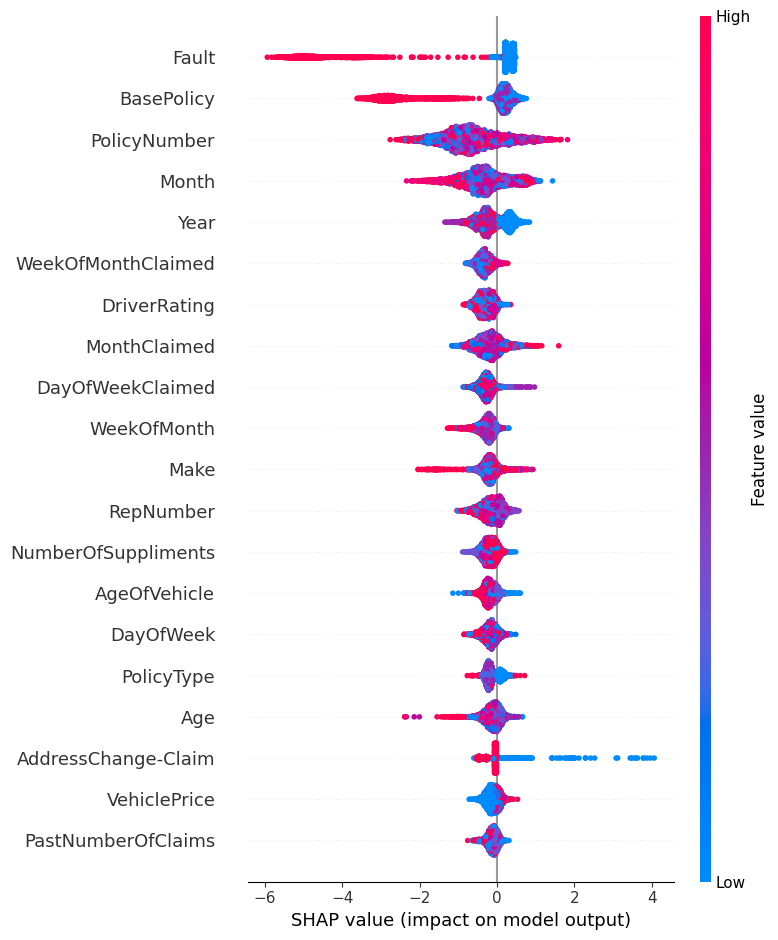

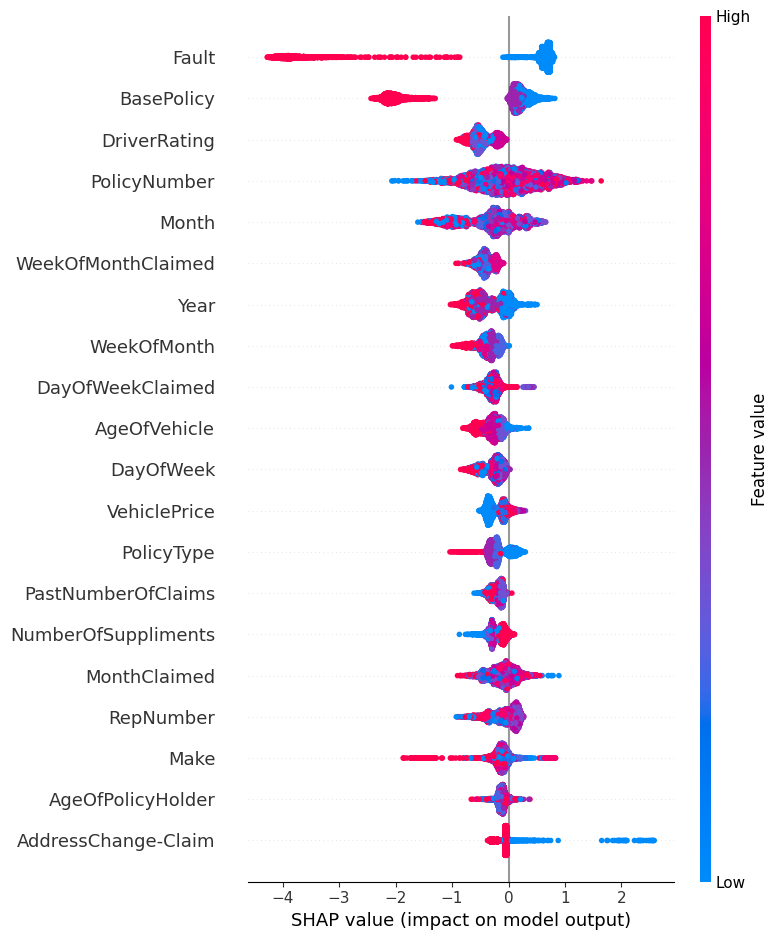

In [67]:
import shap
import numpy as np

# Explain XGBoost
explainer_xgb = shap.TreeExplainer(voting_clf.named_estimators_['xgb'])
shap_values_xgb = explainer_xgb.shap_values(X_test)

shap.summary_plot(shap_values_xgb, X_test, feature_names=X.columns)

# Explain CatBoost
explainer_cat = shap.TreeExplainer(voting_clf.named_estimators_['cat'])
shap_values_cat = explainer_cat.shap_values(X_test)

shap.summary_plot(shap_values_cat, X_test, feature_names=X.columns)


In [68]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

explainer = LimeTabularExplainer(
    training_data=X_train_res,
    feature_names=X.columns,
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)

i = 0  # Index of the test sample you want to explain
exp = explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=voting_clf.predict_proba,
    num_features=10
)

exp.show_in_notebook(show_table=True)


In [69]:
pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.3 MB/s eta 0:00:00


In [70]:
import eli5
from eli5.sklearn import PermutationImportance

# Permutation importance for XGBoost model
perm_xgb = PermutationImportance(voting_clf.named_estimators_['xgb'], random_state=42).fit(X_test, y_test)
eli5.show_weights(perm_xgb, feature_names=X.columns.tolist())

# Permutation importance for CatBoost model
perm_cat = PermutationImportance(voting_clf.named_estimators_['cat'], random_state=42).fit(X_test, y_test)
eli5.show_weights(perm_cat, feature_names=X.columns.tolist())

# Explain single prediction for XGBoost model
i = 2
eli5.show_prediction(voting_clf.named_estimators_['xgb'], X_test[i], feature_names=X.columns.tolist())


In [71]:
import eli5
from eli5.sklearn import PermutationImportance

# Convert test features to DataFrame if needed
X_test_df = pd.DataFrame(X_test, columns=X.columns)

perm_cat = PermutationImportance(voting_clf.named_estimators_['cat'], random_state=42)
perm_cat.fit(X_test_df, y_test)

eli5.show_weights(perm_cat, feature_names=X.columns.tolist())


In [72]:
html_obj = eli5.show_weights(perm_xgb, feature_names=X.columns.tolist())
html_str = html_obj.data  # HTML as string
with open("perm_xgb.html", "w") as f:
    f.write(html_str)


In [73]:
pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 24.4 MB/s eta 0:00:00
  Created wh

In [82]:
import webbrowser
import os

file_path = os.path.abspath("perm_xgb.html")
webbrowser.open_new_tab("file://" + file_path)



False

In [74]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Scale features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Explainable Boosting Machine (EBM)
ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_train, y_train)

# Global explanation: understand overall feature effects
ebm_global = ebm.explain_global()
show(ebm_global)  # Interactive visualization of global feature importances and effects

# Local explanation: understand individual predictions
ebm_local = ebm.explain_local(X_test[:5])
show(ebm_local)   # Interactive visualization explaining first 5 predictions locally


Streaming output truncated to the last 5000 lines.
2025-08-16 15:44:36,249 - interpret.utils._native - INFO - Fast interaction strength start
2025-08-16 15:44:36,251 - interpret.utils._native - INFO - Fast interaction strength end
2025-08-16 15:44:36,252 - interpret.utils._native - INFO - Fast interaction strength start
2025-08-16 15:44:36,252 - interpret.utils._native - INFO - Fast interaction strength end
2025-08-16 15:44:36,256 - interpret.utils._native - INFO - Fast interaction strength start
2025-08-16 15:44:36,266 - interpret.utils._native - INFO - Fast interaction strength end
2025-08-16 15:44:36,266 - interpret.utils._native - INFO - Fast interaction strength start
2025-08-16 15:44:36,267 - interpret.utils._native - INFO - Fast interaction strength end
2025-08-16 15:44:36,268 - interpret.utils._native - INFO - Fast interaction strength start
2025-08-16 15:44:36,269 - interpret.utils._native - INFO - Fast interaction strength end
2025-08-16 15:44:36,270 - interpret.utils._native

2025-08-16 15:49:08,869 - interpret.utils._unify_data - INFO - Unifying data


In [76]:
pip install aix360


In [79]:
pip install tensorflow==1.15


ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==1.15


In [80]:
from aix360.algorithms.contrastive import CEMExplainer
from aix360.metrics import Faithfulness
import numpy as np
cem = CEMExplainer(predict_fn=voting_clf.predict_proba,
                   mode='PN',
                   shape=X_test.shape[1:],
                   max_iterations=1000,
                   feature_range=(np.min(X_test, axis=0), np.max(X_test, axis=0)),
                   lambda_param=0.1,
                   beta=0.1,
                   gamma=1000)


ModuleNotFoundError: No module named 'tensorflow.contrib'

In [75]:
from aix360.algorithms.cem import CEM
from aix360.metrics import Faithfulness
import numpy as np


# Initialize CEM explainer
cem = CEM(predict_fn=voting_clf.predict_proba,
          mode='PN',  # 'PN' = Pertinent Negatives; 'PP' = Pertinent Positives
          shape=X_test.shape[1:],  # number of features
          max_iterations=1000,
          feature_range=(np.min(X_test, axis=0), np.max(X_test, axis=0)),
          lambda_param=0.1,
          beta=0.1,
          gamma=1000)

# Select some test instances to explain (e.g., first 3)
instances = X_test[:3]

# Generate explanations
explanations = cem.explain(instances)



print("Pertinent Negatives:")
print(explanations.pertinent_negatives)

print("Pertinent Positives:")
print(explanations.pertinent_positives)

print("Counterfactuals:")
print(explanations.cf)

# === Evaluate explanation faithfulness ===
faithfulness_metric = Faithfulness()

# Get predictions for original instances
y_pred = voting_clf.predict(X_test[:3])





ModuleNotFoundError: No module named 'aix360.algorithms.cem'